In [1]:
import pandas as pd
df = pd.read_csv('ST_train.csv')

In [2]:
name_transported_df = df[['Name', 'Transported']].copy()
name_transported_df = name_transported_df.dropna(subset=['Name'])
name_transported_df.shape

(8493, 2)

In [3]:
name_transported_df['Name_length'] = name_transported_df['Name'].str.len()
name_transported_df.head()

,Name,Transported,Name_length
0,Maham Ofracculy,False,15
1,Juanna Vines,True,12
2,Altark Susent,False,13
3,Solam Susent,False,12
4,Willy Santantines,True,17


In [4]:
name_transported_df['Transported'] = name_transported_df['Transported'].astype(int)

correlation = name_transported_df['Transported'].corr(name_transported_df['Name_length'])
print("Correlation between 'Transported' and 'Name_length':", correlation)

Correlation between 'Transported' and 'Name_length': 0.005056567966418165


In [5]:
from sklearn.metrics import mutual_info_score
name_transported_df['Transported'] = name_transported_df['Transported'].astype(int)
mi_score = mutual_info_score(name_transported_df['Transported'], name_transported_df['Name_length'])
print("Mutual Information score between 'Transported' and 'Name_length':", mi_score)

Mutual Information score between 'Transported' and 'Name_length': 0.0009945863618998456


In [6]:
name_transported_df['Transported'] = df['Transported']

In [7]:
name_parts = name_transported_df['Name'].str.split(expand=True)
name_transported_df['FirstNameInitial'] = name_parts[0].str[0]
name_transported_df['SurnameInitial'] = name_parts[1].str[0]
name_transported_df['Initials'] = name_transported_df['FirstNameInitial'] + name_transported_df['SurnameInitial']
name_transported_df.head()

,Name,Transported,Name_length,FirstNameInitial,SurnameInitial,Initials
0,Maham Ofracculy,False,15,M,O,MO
1,Juanna Vines,True,12,J,V,JV
2,Altark Susent,False,13,A,S,AS
3,Solam Susent,False,12,S,S,SS
4,Willy Santantines,True,17,W,S,WS


In [8]:
# Function to calculate the ratio
def calculate_ratio(name_transported_df, column):
    grouped = name_transported_df.groupby(column)
    transported_counts = grouped['Transported'].value_counts().unstack(fill_value=0)
    transported_ratio = transported_counts[True] / (transported_counts[False] + 0.1)  # Avoid division by zero
    return transported_ratio.reset_index(name=f'{column}_TransportedRatio')

# Calculate the ratio for each initials column
fname_ratio = calculate_ratio(name_transported_df, 'FirstNameInitial')
sname_ratio = calculate_ratio(name_transported_df, 'SurnameInitial')
initials_ratio = calculate_ratio(name_transported_df, 'Initials')

# Merge these ratios back into the original DataFrame
name_transported_df = name_transported_df.merge(fname_ratio, on='FirstNameInitial', how='left')
name_transported_df = name_transported_df.merge(sname_ratio, on='SurnameInitial', how='left')
name_transported_df = name_transported_df.merge(initials_ratio, on='Initials', how='left')

# Check the DataFrame
name_transported_df.head()

,Name,Transported,Name_length,FirstNameInitial,SurnameInitial,Initials,FirstNameInitial_TransportedRatio,SurnameInitial_TransportedRatio,Initials_TransportedRatio
0,Maham Ofracculy,False,15,M,O,MO,1.257321,1.370558,1.372549
1,Juanna Vines,True,12,J,V,JV,0.979912,1.080196,1.935484
2,Altark Susent,False,13,A,S,AS,1.184992,1.152426,1.170825
3,Solam Susent,False,12,S,S,SS,1.186271,1.152426,1.051213
4,Willy Santantines,True,17,W,S,WS,0.999329,1.152426,1.589404


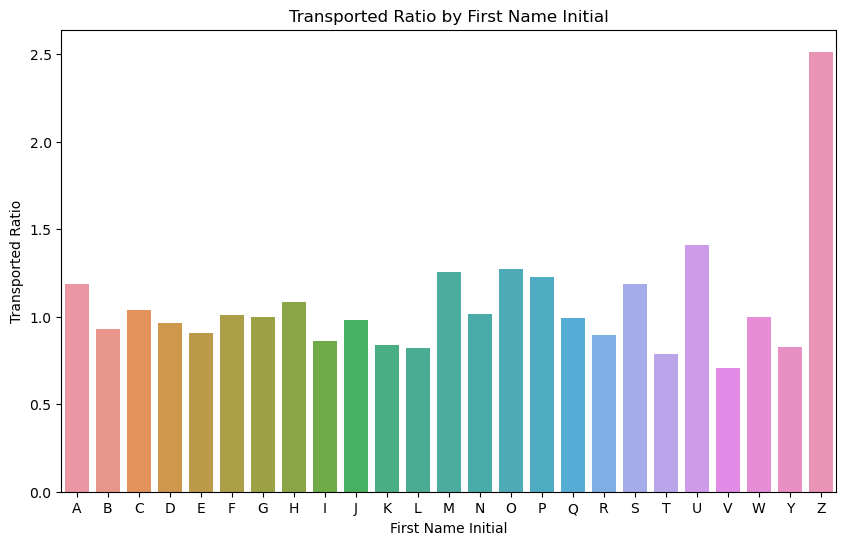

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains the 'FirstNameInitial_TransportedRatio' column

# Sort the DataFrame based on 'FirstNameInitial'
sorted_df = name_transported_df.sort_values(by='FirstNameInitial')

# Plot
plt.figure(figsize=(10, 6))  # Adjust the size of the figure as needed
sns.barplot(x='FirstNameInitial', y='FirstNameInitial_TransportedRatio', data=sorted_df)

# Adding titles and labels for clarity
plt.title('Transported Ratio by First Name Initial')
plt.xlabel('First Name Initial')
plt.ylabel('Transported Ratio')

plt.show()

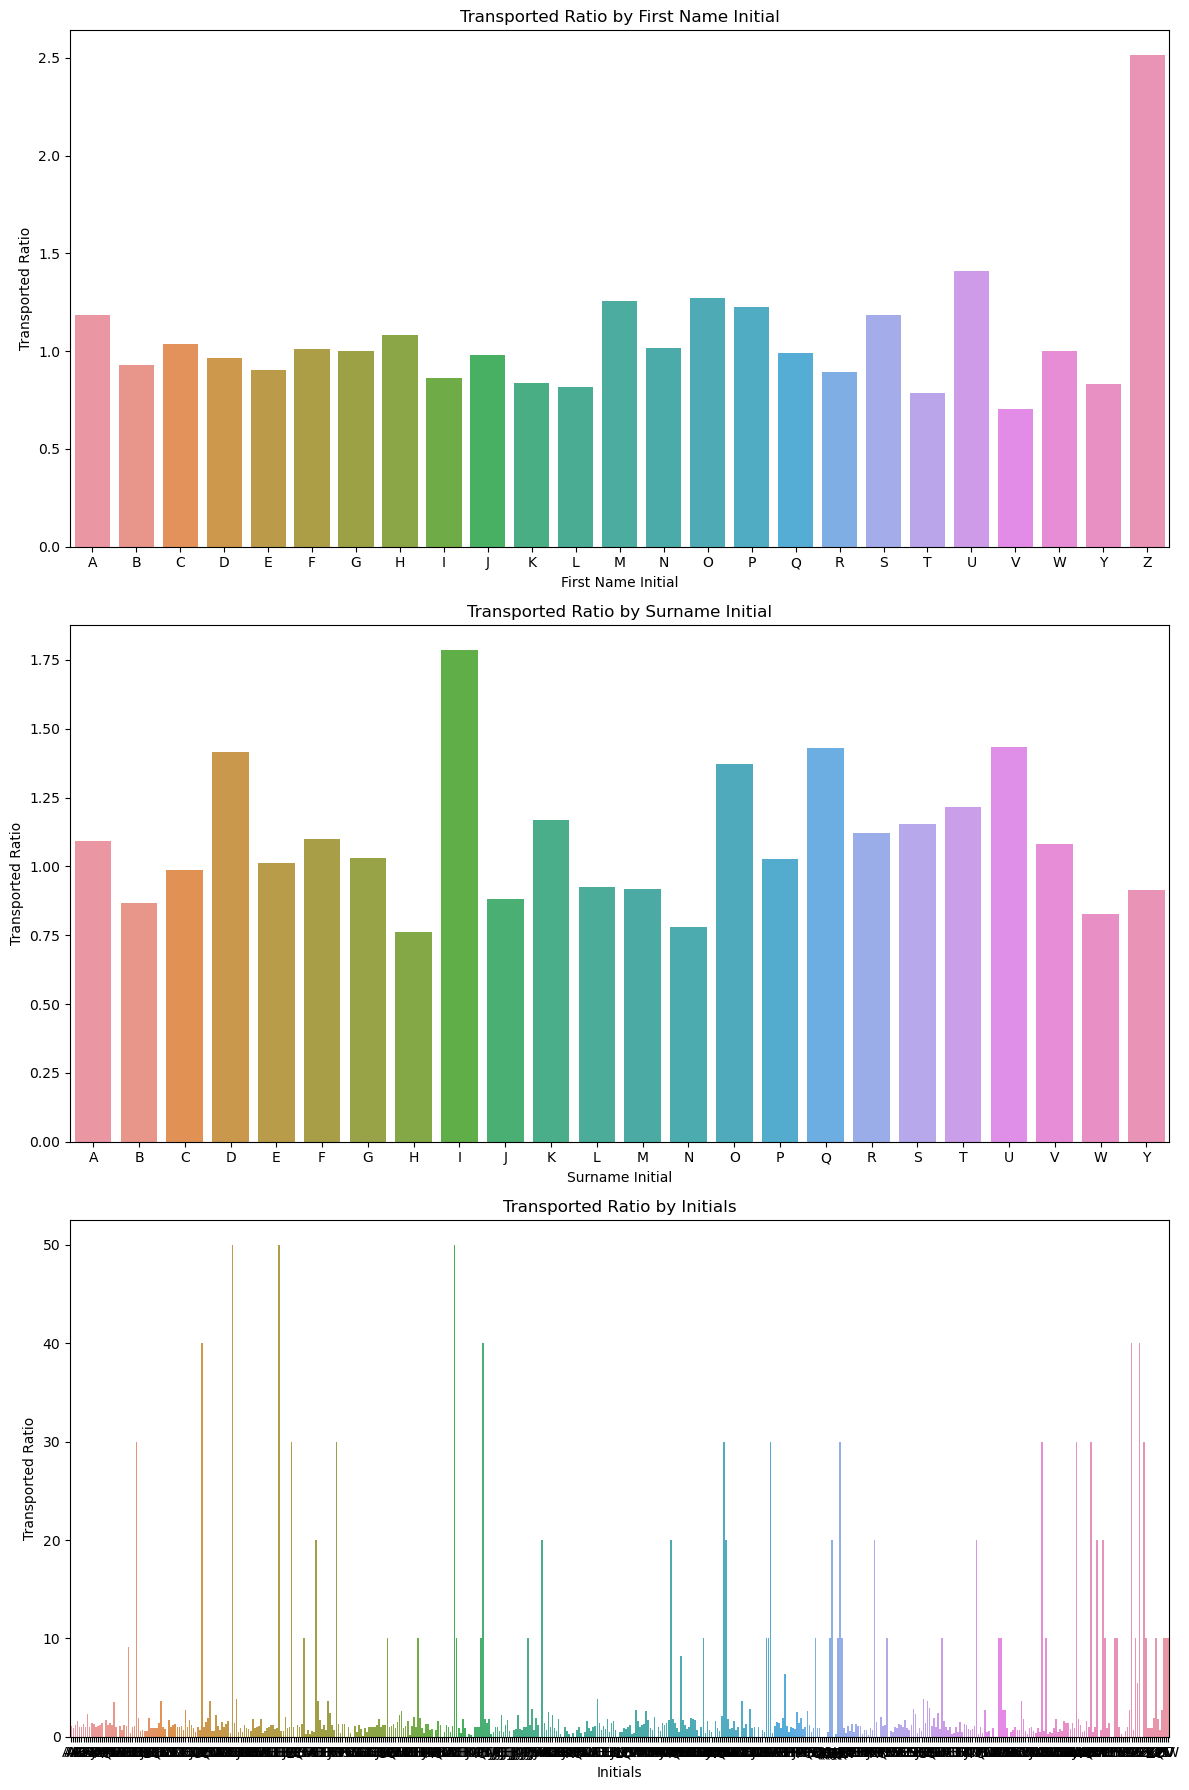

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame based on initials
sorted_df_first = name_transported_df.sort_values(by='FirstNameInitial')
sorted_df_surname = name_transported_df.sort_values(by='SurnameInitial')
sorted_df_initials = name_transported_df.sort_values(by='Initials')

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 1, figsize=(12, 18))  # Adjust the size of the figure as needed

# First Name Initial Barplot
sns.barplot(x='FirstNameInitial', y='FirstNameInitial_TransportedRatio', data=sorted_df_first, ax=axes[0])
axes[0].set_title('Transported Ratio by First Name Initial')
axes[0].set_xlabel('First Name Initial')
axes[0].set_ylabel('Transported Ratio')

# Surname Initial Barplot
sns.barplot(x='SurnameInitial', y='SurnameInitial_TransportedRatio', data=sorted_df_surname, ax=axes[1])
axes[1].set_title('Transported Ratio by Surname Initial')
axes[1].set_xlabel('Surname Initial')
axes[1].set_ylabel('Transported Ratio')

# Initials Barplot
sns.barplot(x='Initials', y='Initials_TransportedRatio', data=sorted_df_initials, ax=axes[2])
axes[2].set_title('Transported Ratio by Initials')
axes[2].set_xlabel('Initials')
axes[2].set_ylabel('Transported Ratio')

# Adjust layout
plt.tight_layout()

plt.show()

In [11]:
firstnameinitial_counts = name_transported_df['FirstNameInitial'].value_counts()
firstnameinitial_counts_sorted = firstnameinitial_counts.sort_index()
surnameInitial_counts = name_transported_df['SurnameInitial'].value_counts()
surnameInitial_counts_sorted = surnameInitial_counts.sort_index()
initials_counts = name_transported_df['Initials'].value_counts()
print(firstnameinitial_counts_sorted)
print(surnameInitial_counts_sorted)
print(initials_counts)

FirstNameInitial
A    920
B    494
C    642
D    444
E    467
F    211
G    462
H    344
I    164
J    404
K    259
L    433
M    578
N    216
O     82
P    294
Q     22
R    345
S    656
T    504
U     17
V    133
W    298
Y     44
Z     60
Name: count, dtype: int64
SurnameInitial
A    274
B    918
C    857
D    365
E    157
F    456
G    386
H    567
I    120
J    128
K    217
L    239
M    683
N    137
O    140
P    693
Q     39
R    365
S    874
T    204
U     78
V    127
W    444
Y     25
Name: count, dtype: int64
Initials
AS    113
AC    100
CB     81
AB     78
SS     76
     ... 
FY      1
YL      1
QT      1
QJ      1
IE      1
Name: count, Length: 539, dtype: int64


**Mutual Information**

In [12]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
import numpy as np

name_transported_df['Transported'] = name_transported_df['Transported'].astype(int)

# One-hot encoding for categorical data
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(name_transported_df[['FirstNameInitial', 'SurnameInitial', 'Initials']])

# Combine encoded features with 'Name_length'
X = np.hstack((encoded_features.toarray(), name_transported_df[['Name_length']].values))

# Calculate mutual information
mi = mutual_info_classif(X, name_transported_df['Transported'])

# Create a Series to view the mutual information
mi_series = pd.Series(mi, index=encoder.get_feature_names_out().tolist() + ['Name_length'])

print(mi_series)

FirstNameInitial_A    0.000000
FirstNameInitial_B    0.000000
FirstNameInitial_C    0.000000
FirstNameInitial_D    0.004189
FirstNameInitial_E    0.000065
                        ...   
Initials_ZT           0.000000
Initials_ZU           0.004600
Initials_ZV           0.000000
Initials_ZW           0.000000
Name_length           0.007049
Length: 589, dtype: float64


In [13]:
top_13_mi = mi_series.nlargest(13)

print(top_13_mi)

Initials_GM           0.015532
Initials_YC           0.014882
Initials_HA           0.014082
FirstNameInitial_L    0.013441
Initials_QW           0.013408
Initials_DU           0.013221
Initials_AU           0.012686
Initials_OS           0.012305
FirstNameInitial_S    0.012152
Initials_OG           0.011910
Initials_CP           0.011563
Initials_ZL           0.011506
Initials_FT           0.011438
dtype: float64
